In [2]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화 툴
import seaborn as sns # 시각화 툴

from scipy import stats #피언슨, 스피어맨 상관계수

from sklearn.datasets import load_boston

## 선형 상관 예제 : MLB Baseball dataset

https://jse.amstat.org/v6n2/datasets.watnik.html

In [3]:
df = pd.read_csv('https://jse.amstat.org/datasets/baseball.dat.txt', sep='\s+')
df.columns = ['Salary', 'Bat_avg', 'OBP', 'Num_runs', 'Num_hits', 'Num_doubles', 'Num_triples', 'Num_hr', 'Num_RBI', 'Num_walks',
             'Num_strikeouts', 'Num_steal', 'Num_errors', 'FA', 'FA_in_91', 'Arbit', 'Arbit_in_91', 'Player_name']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          336 non-null    int64  
 1   Bat_avg         336 non-null    float64
 2   OBP             336 non-null    float64
 3   Num_runs        336 non-null    int64  
 4   Num_hits        336 non-null    int64  
 5   Num_doubles     336 non-null    int64  
 6   Num_triples     336 non-null    int64  
 7   Num_hr          336 non-null    int64  
 8   Num_RBI         336 non-null    int64  
 9   Num_walks       336 non-null    int64  
 10  Num_strikeouts  336 non-null    int64  
 11  Num_steal       336 non-null    int64  
 12  Num_errors      336 non-null    int64  
 13  FA              336 non-null    int64  
 14  FA_in_91        336 non-null    int64  
 15  Arbit           336 non-null    int64  
 16  Arbit_in_91     336 non-null    int64  
 17  Player_name     336 non-null    obj

   - 'Salary' : 연봉(단위 1,000 dolor)
   - 'Bat_avg' : 개인 시즌 타율
   - 'OBP' : 개인 시즌 출루율 (on-base percentage)
   - 'Num_runs' : 개인 시즌 득점 기록
   - 'Num_hits' : 개인 시즌 안타 기록
   - 'Num_doubles' : 개인 시즌 2루타 기록
   - 'Num_triples' : 개인 시즌 3루타 기로
   - 'Num_hr' : 개인 시즌 홈런 기록
   - 'Num_RBI' : 개인 시즌 타점
   - 'Num_walks' : 개인 시즌 볼넷 기록
   - 'Num_strikeouts' : 개인 시즌 삼진
   - 'Num_steal' : 개인 시즌 도루
   - 'Num_errors' : 개인 시즌 범실 개수
   - 'FA' : 개인 시즌 FA 자격 우무 (1 or 0)
   - 'FA_in_91' : 전 시즌 FA 자격 유무(1 or 0)
   - 'Arbit' : 시즌 중재(arbitration)
   - 'Arbit_in_91' : 전 시즌 중재
   - 'Player_name' : 야구 선수 이름

### 산점도를 이용한 출루율(OBP)와 타율(Bat_avg) 관계 확인

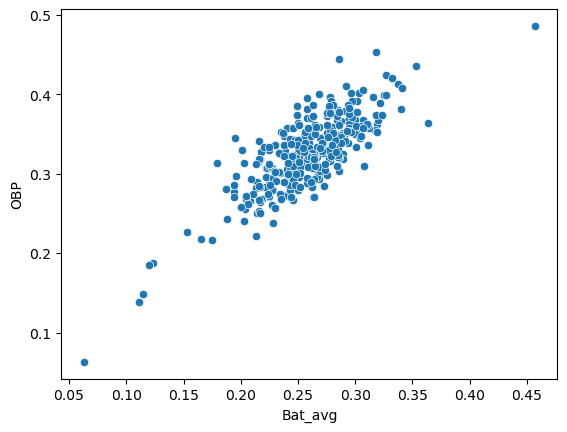

In [5]:
sns.scatterplot(x=df['Bat_avg'], y=df['OBP'])
plt.show()

   - 강한 선형 관계가 있는 것으로 보입니다
   - 하지만 이상자가 눈에 띄는 것이 특징 << 이것이 데이터를 시각화 했을때 얻는 장점중 하나

# 정규성 확인
- Shapiro-Wilk 검정을 통해 정규성을 확인합니다
- 귀무 가설과 대립 가설을 아래와 같습니다.
   - H0 : 데이터가 정규분포를 따름
   - H1 : 데이터가 정규분포를 따르지 않음

In [6]:
# 피어슨 상관계수 확인 전 정규성을 충족하는지 확인

print('타율의 정규성 shaprio test :', stats.shapiro(df['Bat_avg']))
print('출루율의 정규성 shapiro test :', stats.shapiro(df['OBP']))

타율의 정규성 shaprio test : ShapiroResult(statistic=0.947395920753479, pvalue=1.4176015916689266e-09)
출루율의 정규성 shapiro test : ShapiroResult(statistic=0.9594907164573669, pvalue=5.0681421726039844e-08)


### 두 변수 모두 p-value = 0.000 --> 즉, 귀무가설 기각, 두 변수 모두 정규성을 충족하지 않음

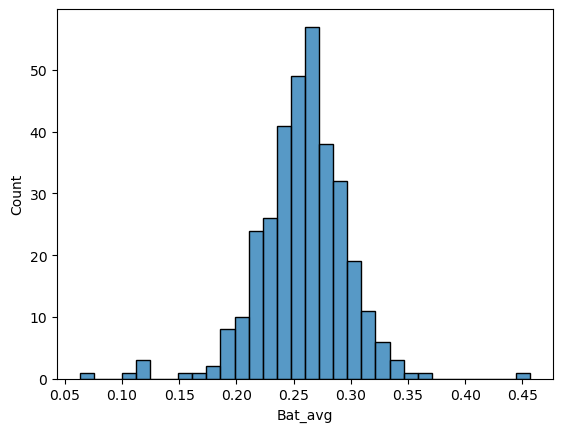

In [7]:
sns.histplot(df['Bat_avg'])
plt.show()

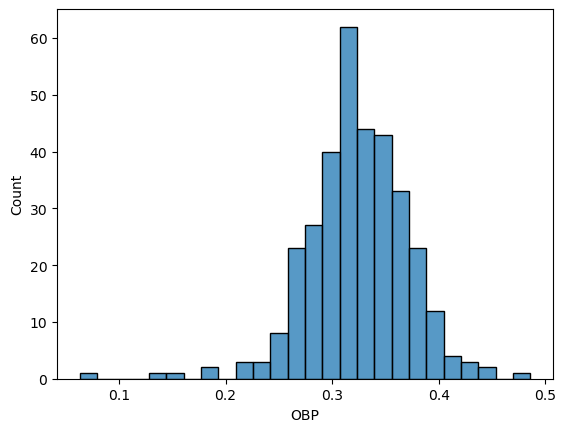

In [8]:
sns.histplot(df['OBP'])
plt.show()

## 이상치 확인


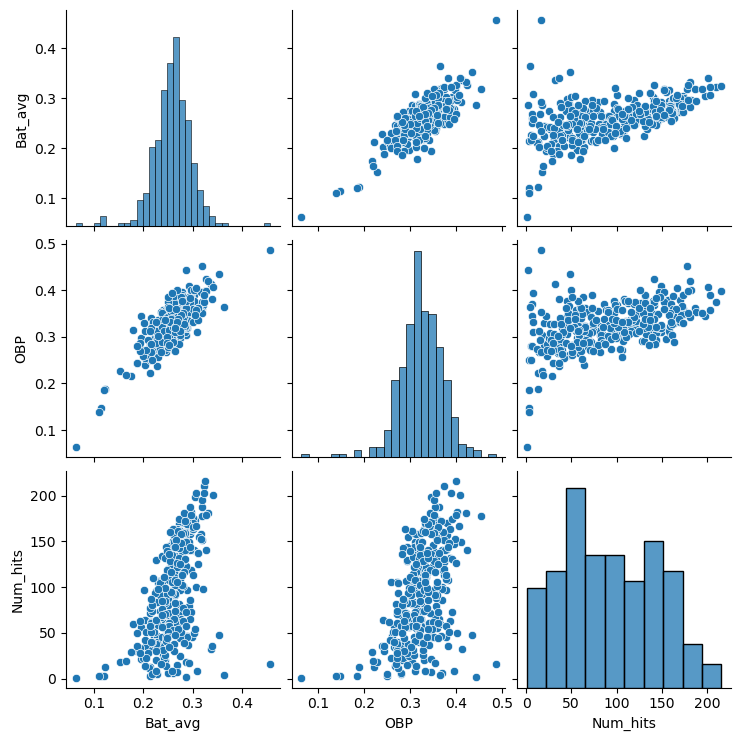

In [9]:
# 이상치 확인을 위해 단변량, 다변량 모두 보여주는 sns의 pairplot을 활용,
# 타석의 수가 없으니 안타의 개수를 토대로 Bat_avg와 OBP를 확인

sns.pairplot(df[['Bat_avg', 'OBP', 'Num_hits']])
plt.show()

 - 안태의 개수가 0~25 사이에 있지만, 타율과 출루율은 0.4를 넘기는 경우도 있고, 0에 근저한 데이터 포인트도 존재한다는 것을 확인
 - 이상치 제거 필요
 - 본 실습에선 안타 50개 이상을 친 플레이어로 제한하여 상관분석을 진행

## 이상치 제거

In [10]:
# 타석에 대한 정보가 없지만 ,간접적으로 안타 개수를 확인하여 가늠할 수 있다.
# 안타 개수 50개 이상부터 정용 필요

new_df = df.loc[df['Num_hits'] >= 50, :].copy()
new_df # 257 x 18

,Salary,Bat_avg,OBP,Num_runs,Num_hits,Num_doubles,Num_triples,Num_hr,Num_RBI,Num_walks,Num_strikeouts,Num_steal,Num_errors,FA,FA_in_91,Arbit,Arbit_in_91,Player_name
0,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
1,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
2,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
3,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace
4,2175,0.291,0.379,104,170,32,2,26,100,87,89,22,4,1,0,0,0,Ryne Sandberg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,287,0.264,0.321,78,144,34,1,27,102,42,118,4,6,0,0,0,0,Juan Gonzalez
328,230,0.269,0.332,46,106,22,0,20,69,33,93,0,6,0,0,0,0,Kevin Reimer
330,183,0.213,0.312,36,57,8,3,2,26,39,32,8,15,0,0,0,0,Jeff Huson
333,142,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,Dean Palmer


In [11]:
print('안타개수 조건 생성 전 데이터셋의 행의 수 :', df.shape[0])
print('안타개수 조건 생성 후 데이터셋의 행의 수 :', new_df.shape[0])

안타개수 조건 생성 전 데이터셋의 행의 수 : 336
안타개수 조건 생성 후 데이터셋의 행의 수 : 257


## 정규성 재검정

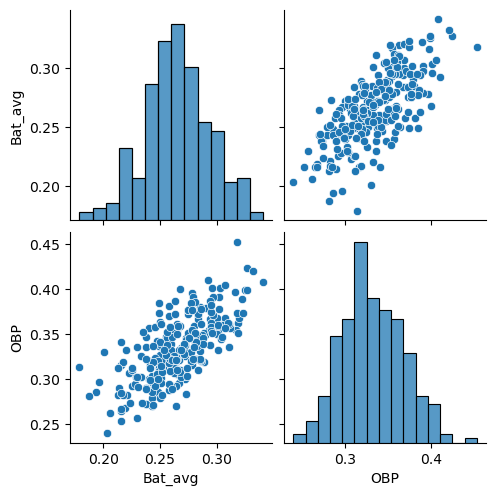

In [12]:
#pairplot으로 단변량, 다변량 확인
sns.pairplot(new_df[['Bat_avg','OBP']])
plt.show()

In [13]:
# 이상치 제거 후 정규성을 충족하는지 확인

print('타율의 정규성 shaprio test :', stats.shapiro(new_df['Bat_avg']))
print('출루율의 정규성 shapiro test :', stats.shapiro(new_df['OBP']))

타율의 정규성 shaprio test : ShapiroResult(statistic=0.9955571889877319, pvalue=0.6723843216896057)
출루율의 정규성 shapiro test : ShapiroResult(statistic=0.995083749294281, pvalue=0.5834056735038757)


귀무 가설 기각 실패 --> 정규성 충족

## 피어슨 상관계수 산출
   - H0 : 타율과 출루율은 선형적 관계가 없다
   - H1 : 타율과 출루율은 선형적 관계가 있다

In [15]:
# pearson correlation은 scipy의 pearson 함수 이용

stats.pearsonr(new_df['Bat_avg'], new_df['OBP'])

(0.7000019161617719, 3.6839153456000914e-39)

In [16]:
print('타율과 출루율의 피어슨 상관계수 : {:.3f}'.format(stats.pearsonr(new_df['Bat_avg'], new_df['OBP'])[0]))
print('타율과 출루율의 피어슨 상관계수 p_value: {:.3f}'.format(stats.pearsonr(new_df['Bat_avg'], new_df['OBP'])[1]))

타율과 출루율의 피어슨 상관계수 : 0.700
타율과 출루율의 피어슨 상관계수 p_value: 0.000


귀무가설 기각 --> 선형적 관계가 있다

## 비선형 순위 상관

In [20]:
# 실습활용을 위한 sklearn 패키지내 보스턴 주택가격 데이터 로딩
# sklearn 상위버전(1.2)에서 데이터 셋을 더이상 제공하지 않음

# from sklearn.datasets import load_boston
# with warnings.catch_warnings():
#     warnings.filterwarnings('ignore')
#     data = load_boston()

# 상위버전 이용시 sklearn 참고 페이지 내 코드 실행하여 데이터 로딩
# data 및 target을 Dataframge으로 생성후 추후 marge

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2,:2]])
target = raw_df.values[1::2, 2] 

# 데이터 프레임 생성 및 Mearge
housing = pd.merge(pd.DataFrame(data), pd.DataFrame(target), left_index =True, right_index=True, how='inner')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 데이터 컬럼 설명

#### 보스턴 인근 Town 별 주택 가격 밎 관련 정보 데이터셋

- CRIM :    per capita crime rate by town
- ZN :      proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS :   proportion of non-retail business acres per town
- CHAS :    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX :     nitric oxides concentration (parts per 10 million)
- RM :      average number of rooms per dwelling
- AGE :     proportion of owner-occupied units built prior to 1940
- DIS :     weighted distances to five Boston employment centres
- RAD :     index of accessibility to radial highways
- TAX :     full-value property-tax rate per 10,000 dollar
- PTRATIO : pupil-teacher ratio by town
- B :       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT :   persent lower status of the population
- MEDV :    Median value of owner-occupied homes in 1000 dollar's

In [25]:
type(boston)
# sklean에서 로딩했을경우 sklean.utils.Bunch 출력
# Bunch라는 자료구조 활용 key-value 형식으로 구성되어 있으며, 사전(dictionaly)와 비슷한 구조를 갖고 있는것이 특징

pandas.core.frame.DataFrame

In [29]:
# boston key 확인
# bostion.keys()
# 출력 : dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [31]:
#현재 실습에선 boston을 변수로 함
boston_df = housing.copy()
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


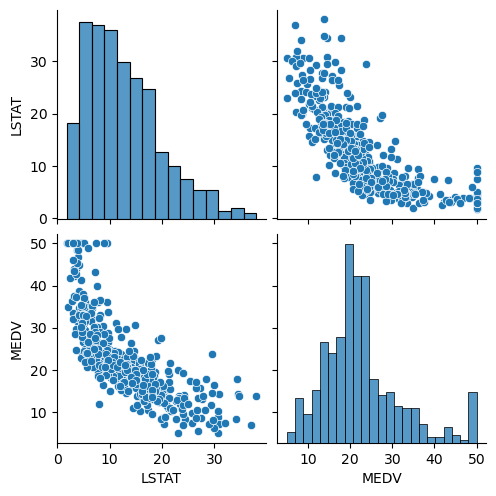

In [34]:
# pairplot을 통한 단변량, 다변량 확인
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

   - 산점도 : 비선형 관계 포착
   - 히스토그램 : 정규분포와는 거리가 멀어보임 --> i.e 이상치 제거로도 선형성 확보는 힘들어보인다.
   

두가지 방안 존재 : "log변환" VS "(비모수)비선형 스피어맨 순위 상관분석 실시"

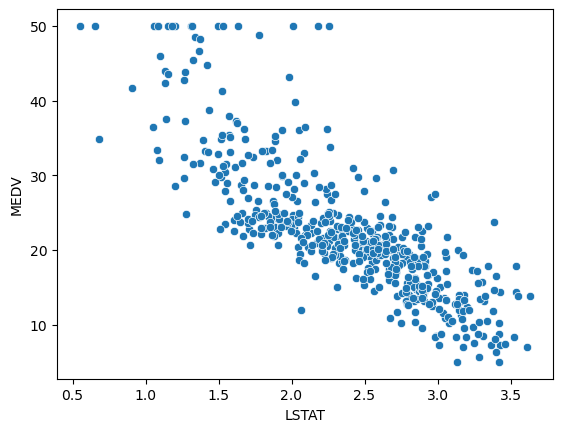

In [41]:
# 로그변환으로 선형화 후 산점도 확인
sns.scatterplot(x=np.log(boston_df['LSTAT']), y=boston_df['MEDV'])
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='Count'>

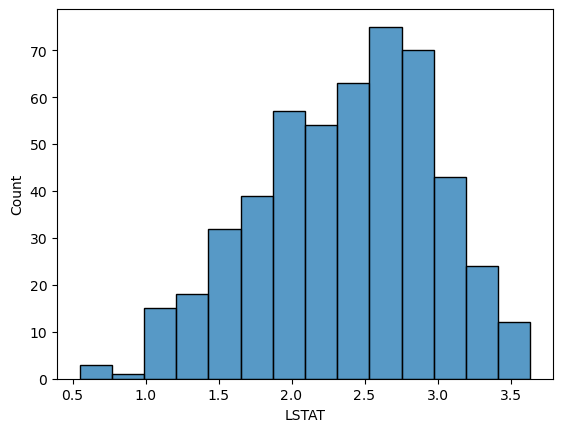

In [43]:
# 로그 변환후 LSTAT 분포 확인
sns.histplot(np.log(boston_df['LSTAT']))

In [44]:
stats.shapiro(np.log(boston_df['LSTAT'])) # 정규성 가정 충족 실패

ShapiroResult(statistic=0.9861650466918945, pvalue=9.793879871722311e-05)

## 비선형 순위 상관 스피어맨

In [45]:
# scipy의 spearmanr 함수 이용
stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])

SpearmanrResult(correlation=-0.8529141394922163, pvalue=2.221727524313283e-144)

In [47]:
spearman = stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])
print('스피어맨 상관계수 : {:.4f}'.format(spearman[0]))
print('유의확률(p_value) : {:.4f}'.format(spearman[1]))

스피어맨 상관계수 : -0.8529
유의확률(p_value) : 0.0000


- 스피어맨 상관계수가 높고 유의성이 높지만 선형성과 정규성이 만족되지 않아 통계적 유의성은 확보는 어려움
- 하지만 계수간의 의미가 시사하는 바를 확인하는것이 목적

In [48]:
# 계수간 비교
print('스피어맨 상관계수 : {:.4f}'.format(stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])[0]))
print('피어슨 상관계수 : {:.4f}'.format(stats.pearsonr(boston_df['LSTAT'], boston_df['MEDV'])[0]))

스피어맨 상관계수 : -0.8529
피어슨 상관계수 : -0.7377


분포를 고려했을 때, 스피어맨 상관계수가 순위를 고려하여 피어슨에 비해 더 적합한 상관성을 제시하고 있습니다.